# Import Data

In [ ]:
import pandas as pd
import numpy as np
import zipfile
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from pytorch_tabnet.tab_model import TabNetClassifier
from sklearn.metrics import accuracy_score

In [16]:
zip_path = "E:\Coding\sem5\DL\ProjekAkhirDL\ALLFLOWMETER_HIKARI2021.zip"

with zipfile.ZipFile(zip_path, 'r') as zipped_file:
    csv_file_name = zipped_file.namelist()[0]

    with zipped_file.open(csv_file_name) as csv_file:
        df = pd.read_csv(csv_file)

<>:1: SyntaxWarning: invalid escape sequence '\C'
<>:1: SyntaxWarning: invalid escape sequence '\C'
C:\Users\hadik\AppData\Local\Temp\ipykernel_21336\798606535.py:1: SyntaxWarning: invalid escape sequence '\C'
  zip_path = "E:\Coding\sem5\DL\ProjekAkhirDL\ALLFLOWMETER_HIKARI2021.zip"


In [17]:
df.head()

,Unnamed: 0.1,Unnamed: 0,uid,originh,originp,responh,responp,flow_duration,fwd_pkts_tot,bwd_pkts_tot,...,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,traffic_category,Label
0,0,0,Cg61Jch3vdz9DBptj,103.255.15.23,13316,128.199.242.104,443,2.207588,15,14,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,29200,65160,0,Bruteforce-XML,1
1,1,1,CdRIlqLWdj35Y9vW9,103.255.15.23,13318,128.199.242.104,443,15.624266,15,14,...,1.534300e+07,1.534300e+07,1.534300e+07,1.534300e+07,0.0,29200,65160,0,Bruteforce-XML,1
2,2,2,CLzp9Khd0Y09Qkgrg,103.255.15.23,13320,128.199.242.104,443,12.203357,14,13,...,1.196814e+07,1.196814e+07,1.196814e+07,1.196814e+07,0.0,29200,65160,0,Bruteforce-XML,1
3,3,3,Cnf1YA4iLB4CSNWB88,103.255.15.23,13322,128.199.242.104,443,9.992448,14,13,...,9.759205e+06,9.759205e+06,9.759205e+06,9.759205e+06,0.0,29200,65160,0,Bruteforce-XML,1
4,4,4,C4ZKvv3fpO72EAOsJ6,103.255.15.23,13324,128.199.242.104,443,7.780611,14,14,...,7.545305e+06,7.545305e+06,7.545305e+06,7.545305e+06,0.0,29200,65160,0,Bruteforce-XML,1


# Preprocessing Data

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555278 entries, 0 to 555277
Data columns (total 88 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Unnamed: 0.1              555278 non-null  int64  
 1   Unnamed: 0                555278 non-null  int64  
 2   uid                       555278 non-null  object 
 3   originh                   555278 non-null  object 
 4   originp                   555278 non-null  int64  
 5   responh                   555278 non-null  object 
 6   responp                   555278 non-null  int64  
 7   flow_duration             555278 non-null  float64
 8   fwd_pkts_tot              555278 non-null  int64  
 9   bwd_pkts_tot              555278 non-null  int64  
 10  fwd_data_pkts_tot         555278 non-null  int64  
 11  bwd_data_pkts_tot         555278 non-null  int64  
 12  fwd_pkts_per_sec          555278 non-null  float64
 13  bwd_pkts_per_sec          555278 non-null  f

In [19]:
df.shape[0]

555278

In [20]:
df.isnull().sum().any()

False

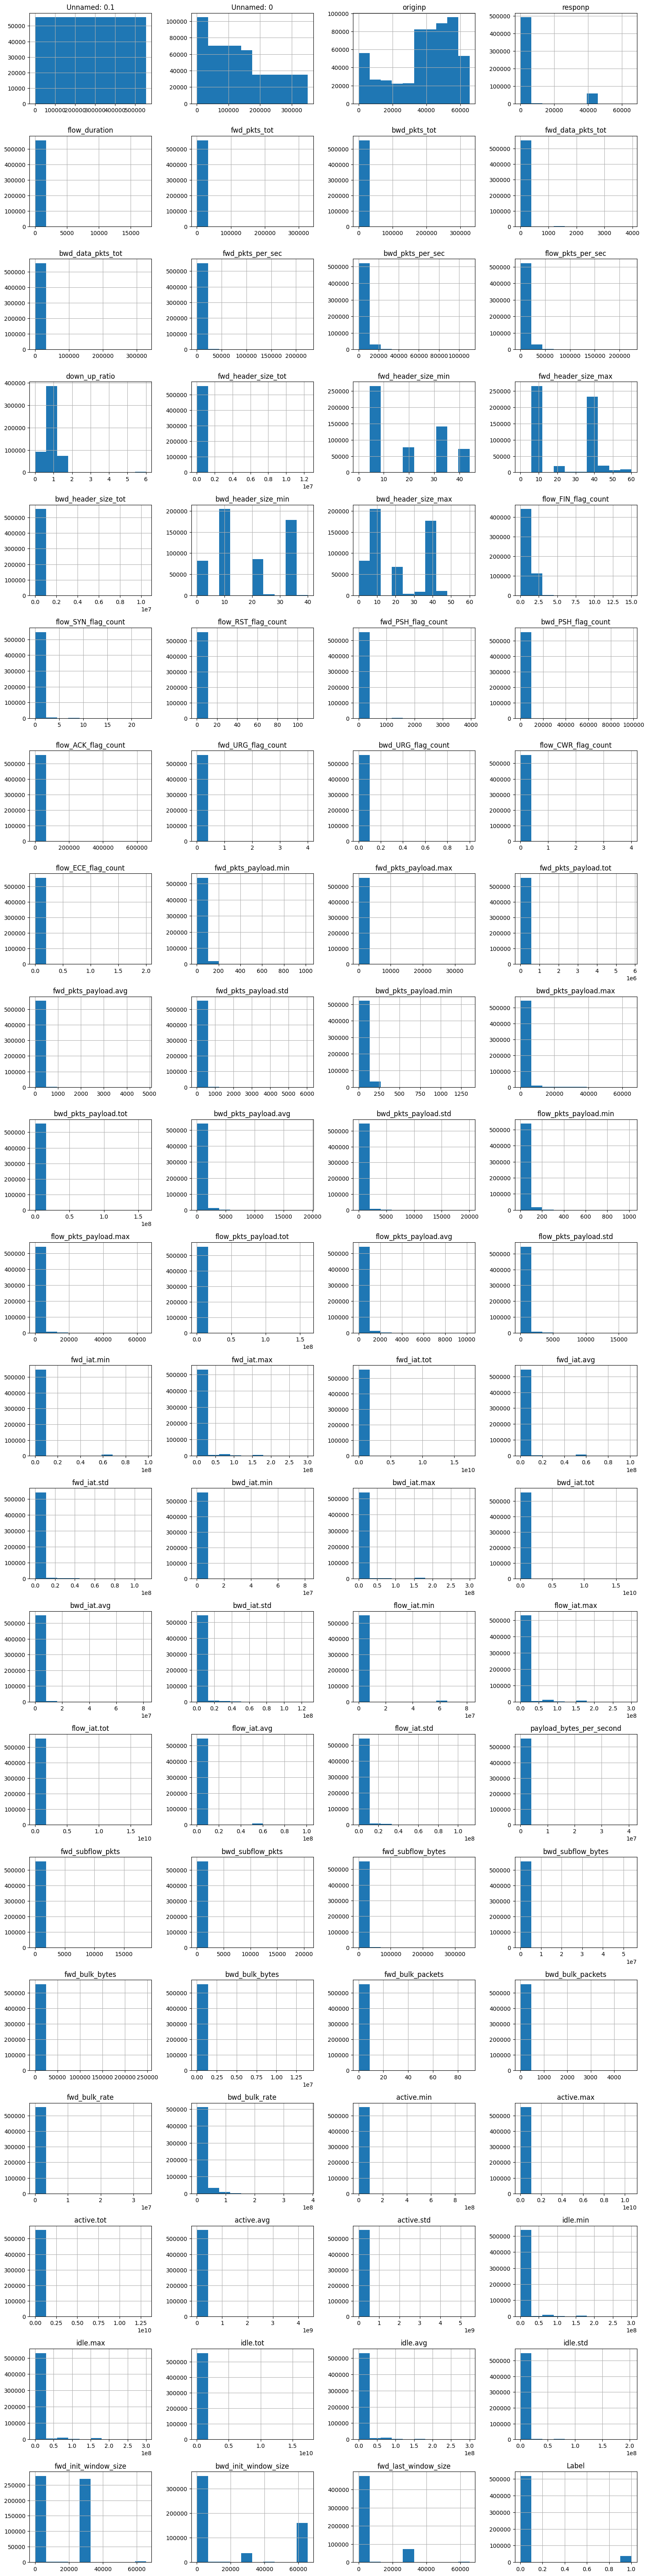

In [21]:
num_features = len(df.columns)
cols = 4
rows = math.ceil(num_features / cols) 

df.hist(figsize=(cols * 4, rows * 3), layout=(rows, cols))
plt.tight_layout()
plt.show()

In [22]:
object_features = df.select_dtypes(include=['object'])

print(object_features.columns)

Index(['uid', 'originh', 'responh', 'traffic_category'], dtype='object')


In [23]:
encoder = LabelEncoder()

for col in object_features:
    df[col] = encoder.fit_transform(df[col])

In [24]:
zscore = StandardScaler()
df_zscore = zscore.fit_transform(df)
df = pd.DataFrame(df_zscore, columns=df.columns)

In [25]:
minmax = MinMaxScaler()
df_scaled = minmax.fit_transform(df)
df = pd.DataFrame(df_scaled, columns=df.columns)

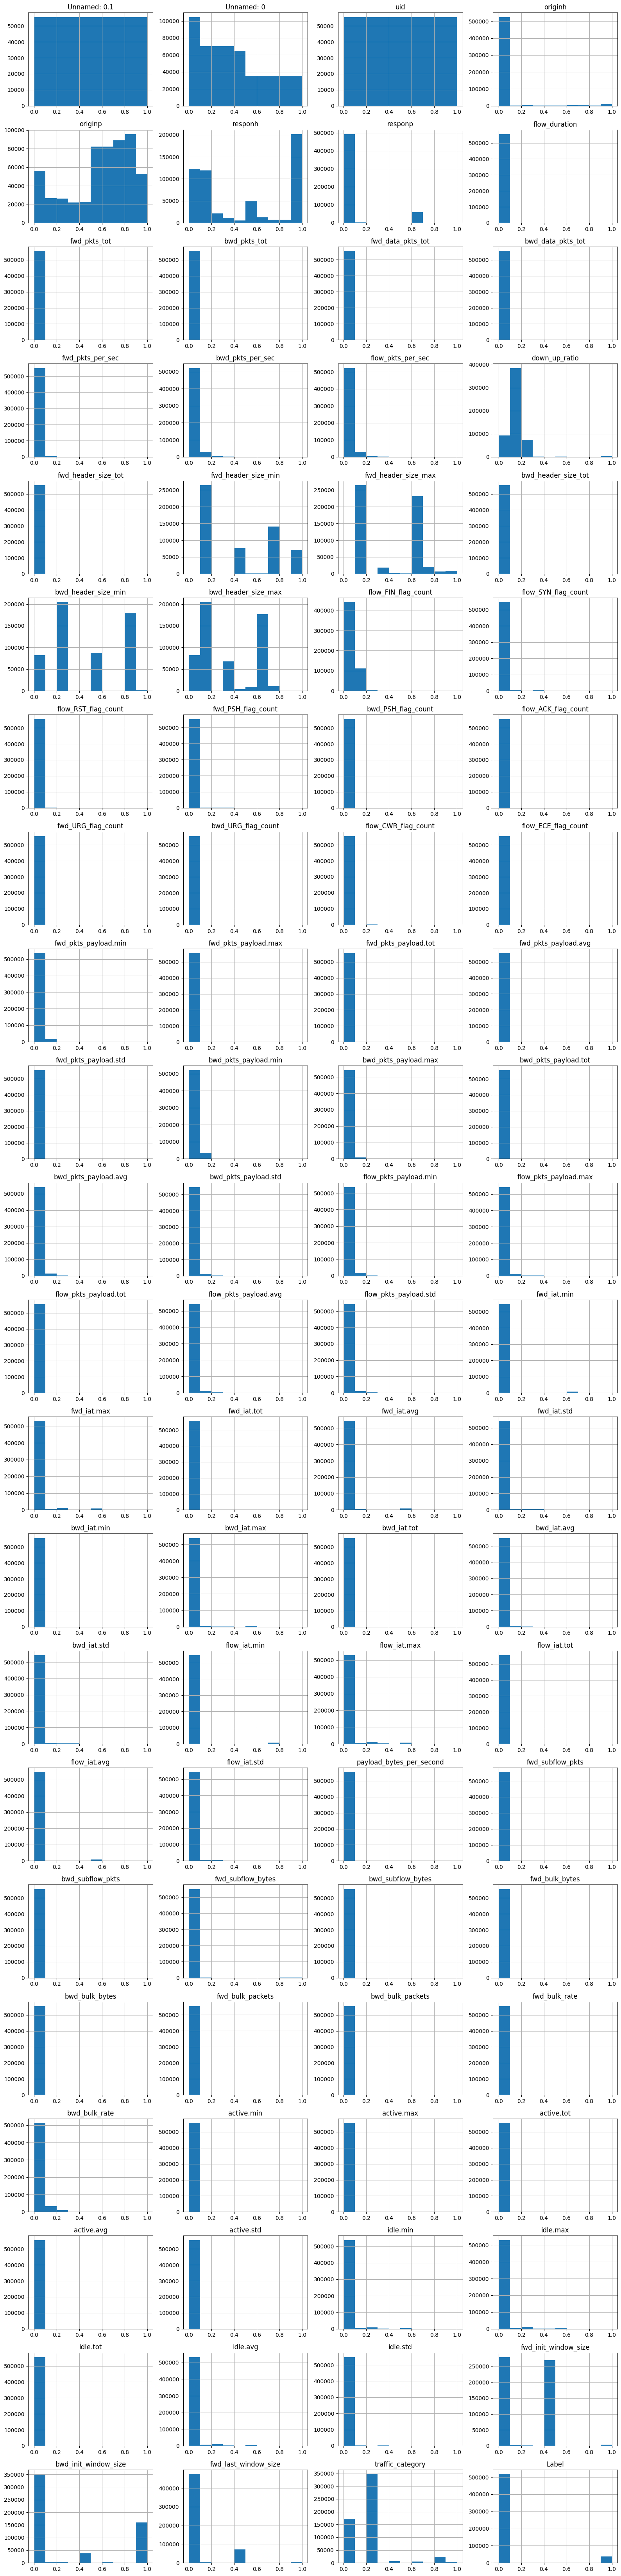

In [26]:
df.hist(figsize=(cols * 4, rows * 3), layout=(rows, cols))
plt.tight_layout()
plt.show()

In [28]:
X = df.drop('Label', axis=1).to_numpy()
y = df['Label'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

# Model

## TabNet

In [ ]:
model_tabnet = TabNetClassifier()
model_tabnet.fit(X_train, y_train, eval_set=[(X_test, y_test)], max_epochs=100, patience=20)

c:\Users\hadik\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.02447 | val_0_auc: 1.0     |  0:00:17s
epoch 1  | loss: 0.00042 | val_0_auc: 1.0     |  0:00:35s
epoch 2  | loss: 0.00066 | val_0_auc: 1.0     |  0:00:52s
epoch 3  | loss: 0.00019 | val_0_auc: 1.0     |  0:01:09s
epoch 4  | loss: 0.00057 | val_0_auc: 1.0     |  0:01:27s
epoch 5  | loss: 0.00022 | val_0_auc: 1.0     |  0:01:45s
epoch 6  | loss: 0.00031 | val_0_auc: 1.0     |  0:02:02s
epoch 7  | loss: 8e-05   | val_0_auc: 1.0     |  0:02:19s
epoch 8  | loss: 5e-05   | val_0_auc: 1.0     |  0:02:36s
epoch 9  | loss: 5e-05   | val_0_auc: 1.0     |  0:02:52s
epoch 10 | loss: 4e-05   | val_0_auc: 1.0     |  0:03:09s
epoch 11 | loss: 4e-05   | val_0_auc: 1.0     |  0:03:27s
epoch 12 | loss: 0.00019 | val_0_auc: 1.0     |  0:03:44s
epoch 13 | loss: 3e-05   | val_0_auc: 1.0     |  0:04:01s
epoch 14 | loss: 2e-05   | val_0_auc: 1.0     |  0:04:19s
epoch 15 | loss: 0.00012 | val_0_auc: 1.0     |  0:04:36s
epoch 16 | loss: 2e-05   | val_0_auc: 1.0     |  0:04:53s
epoch 17 | los

c:\Users\hadik\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


AttributeError: 'TabNetClassifier' object has no attribute 'score'

In [ ]:
y_pred = model_tabnet.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')


Accuracy: 1.0
